In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data
data = pd.read_csv('creditcard.csv')

In [3]:
# check the shape of the data
print(data.shape)

# check the first few rows of the data
print(data.head())

# check the statistical summary of the data
print(data.describe())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [4]:
# check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# check for duplicate values
print(data.duplicated().sum())

1081


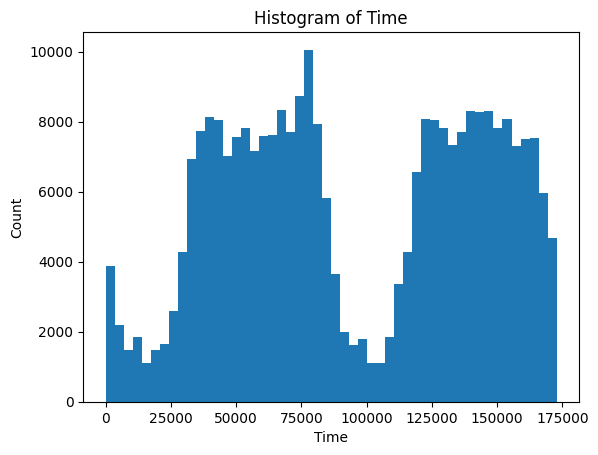

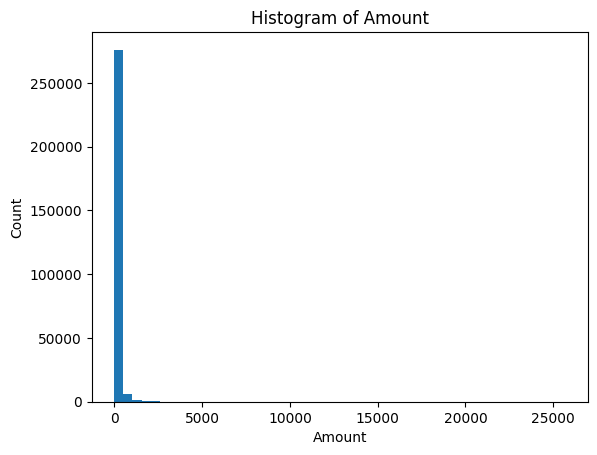

In [6]:
# create a histogram of the Time column
plt.hist(data['Time'], bins=50)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Histogram of Time')
plt.show()

# create a histogram of the Amount column
plt.hist(data['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Histogram of Amount')
plt.show()

In [7]:
# normalize the Amount column using the log function
data['Amount'] = np.log(data['Amount'] + 1)

In [8]:
# drop the Time column
data = data.drop('Time', axis=1)

In [9]:
# define X and y
X = data.drop('Class', axis=1)
y = data['Class']

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# define the random under-sampling strategy
rus = RandomUnderSampler(random_state=42)

# perform random under-sampling on the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# check for class imbalance after random under-sampling
print(pd.Series(y_resampled).value_counts())

# combine the resampled data into a new dataframe
data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# shuffle the resampled data
data_resampled = data_resampled.sample(frac=1).reset_index(drop=True)

# check the shape of the resampled data
print(data_resampled.shape)

0    492
1    492
Name: Class, dtype: int64
(984, 30)


In [11]:
from sklearn.model_selection import train_test_split

# split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_resampled.drop('Class', axis=1), data_resampled['Class'], test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

# standardize the train and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)